## Problem: Detection of aggressive tweets

Dataset: https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls/home

The dataset has 20001 tweets (in english) which are labeled (by human) as:
* 1 (Cyber-Aggressive)
* 0 (Non Cyber-Aggressive)

# Preparing Data

### Reading data

In [1]:
import json
import os

In [2]:
data_file_path = './Data'
input_file_name = 'Dataset_for_Detection_of_Cyber-Trolls.json'

In [3]:
with open(os.path.join(data_file_path, input_file_name), 'r') as file:
    json_str = '[' + file.read() + ']'
    json_str = json_str.replace('}\n', '},', json_str.count('}\n') - 1)
    data_raw = json.loads(json_str)
    
    assert len(data_raw) == 20001

### Reviewing data

In [4]:
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [5]:
data_raw[0]

{'content': ' Get fucking real dude.',
 'annotation': {'notes': '', 'label': ['1']},
 'extras': None}

In [6]:
# check if the field 'extras' is relevant
(np.array([record['extras'] for record in data_raw]) != None).sum()

0

In [7]:
# check if the field 'notes' is relevant
(np.array([record['annotation']['notes'] for record in data_raw]) != '').sum()

0

In [8]:
# keep only relevant information
data = json_normalize(data_raw, record_path=[['annotation', 'label']], meta=['content'])

In [9]:
data.head()

,0,content
0,1,Get fucking real dude.
1,1,She is as dirty as they come and that crook ...
2,1,why did you fuck it up. I could do it all day...
3,1,Dude they dont finish enclosing the fucking s...
4,1,WTF are you talking about Men? No men thats n...


In [10]:
data.rename(columns={0: 'label'}, inplace=True)

In [11]:
data.shape

(20001, 2)

In [12]:
data.dtypes

label      object
content    object
dtype: object

In [13]:
data['label'] = data.label.astype(np.int)

In [14]:
# check if the field 'content' is always filled
print(data.content.isnull().sum())
print((data.content == '').sum())

0
0


Length of tweets should be less than or equal to 280 characters

In [15]:
tweet_length = np.array([len(doc) for doc in data.content])

In [16]:
tweet_length[tweet_length > 280]

array([ 346,  444,  323,  475,  550, 1005, 1738,  293,  703,  366,  333,
        323,  371,  296,  476,  337,  289,  867,  281,  887,  463,  291,
        343,  439,  684,  322,  307,  288,  340,  488, 1083,  281,  314,
        350,  659,  456,  378,  654])

In [17]:
(tweet_length > 280).sum()

38

In [18]:
tweet_length.min(), tweet_length.mean(), tweet_length.max()

(1, 67.70881455927204, 1738)

In [19]:
data[tweet_length < 10].shape

(719, 2)

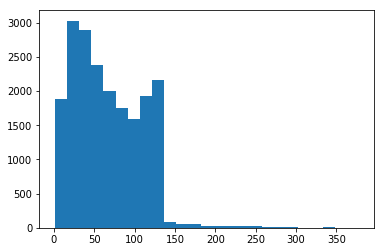

In [22]:
plt.hist(tweet_length[tweet_length < 400], bins=25)
plt.show()

In [20]:
too_long_inds = np.argwhere(tweet_length > 280).T[0]

In [21]:
data = data.drop(labels=too_long_inds, axis=0)
data.shape

(19963, 2)

In [22]:
tweet_length = np.array([len(doc) for doc in data.content])
tweet_length.min(), tweet_length.mean(), tweet_length.max()

(1, 66.8938035365426, 280)

### Dividing data into the training, validation and test part

Aggressive tweets are duplicated, so the data are quite balanced

In [23]:
print('Data: ', 'class 1 contribution = %.2f' % data.label.mean(), 
      'shape = %s' % (data.shape,), sep='\n')
print('Unique data: ', 'class 1 contribution = %.2f' % data.drop_duplicates().label.mean(), 
      'shape = %s' % (data.drop_duplicates().shape,), sep='\n')

Data: 
class 1 contribution = 0.39
shape = (19963, 2)
Unique data: 
class 1 contribution = 0.19
shape = (14615, 2)


In [24]:
np.unique(data.label, return_counts=True)

(array([0, 1]), array([12141,  7822]))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=123)

In [27]:
print('Training data: ', 'class 1 contribution = %.2f' % data_train.label.mean(), 
      'shape = %s' % (data_train.shape,), sep='\n', end='\n\n')
print('Test data: ', 'class 1 contribution = %.2f' % data_test.label.mean(), 
      'shape = %s' % (data_test.shape,), sep='\n')

Training data: 
class 1 contribution = 0.39
shape = (15970, 2)

Test data: 
class 1 contribution = 0.38
shape = (3993, 2)


In [28]:
data_train, data_valid = train_test_split(data_train, test_size=0.2, shuffle=True, random_state=0)

In [29]:
print('Training data: ', 'class 1 contribution = %.2f' % data_train.label.mean(), 
      'shape = %s' % (data_train.shape,), sep='\n', end='\n\n')
print('Validation data: ', 'class 1 contribution = %.2f' % data_valid.label.mean(), 
      'shape = %s' % (data_valid.shape,), sep='\n')

Training data: 
class 1 contribution = 0.40
shape = (12776, 2)

Validation data: 
class 1 contribution = 0.38
shape = (3194, 2)


In [30]:
# save the datasets
train_file_name = 'train.json'
valid_file_name = 'valid.json'
test_file_name = 'test.json'

data_train.to_json(os.path.join(data_file_path, train_file_name), orient='records')
data_valid.to_json(os.path.join(data_file_path, valid_file_name), orient='records')
data_test.to_json(os.path.join(data_file_path, test_file_name), orient='records')